<a href="https://colab.research.google.com/github/SohamSharangpani/ML/blob/master/Lab/ML_04_27072020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment 4

## Exercise 1 : Exploring Canadian immigration data from 1980 to 2013

Dataset : 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx'


In [ ]:
import numpy as np  
import pandas as pd 

canada = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


**Preprocessing**

In [ ]:
canada.drop(['AREA','Coverage','Type','REG','DEV'], axis='columns', inplace=True)

canada.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Continent-Region','DevName':'Development-status'}, inplace=True)

canada.set_index('Country', inplace=True)

canada['Total'] = canada.sum(axis='columns')

years = range(1980, 2014)

canada.head()

,Continent,Continent-Region,Development-status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


Things to do
Pie charts

1.   Pie charts
2.  Box plots
3. Scatter plots
4. Bubble plots


In [ ]:
#import packages

import matplotlib.pyplot as plt
import matplotlib as mpl

## Pie Charts

Text(0.5, 1.0, 'Total immigration to Canada')

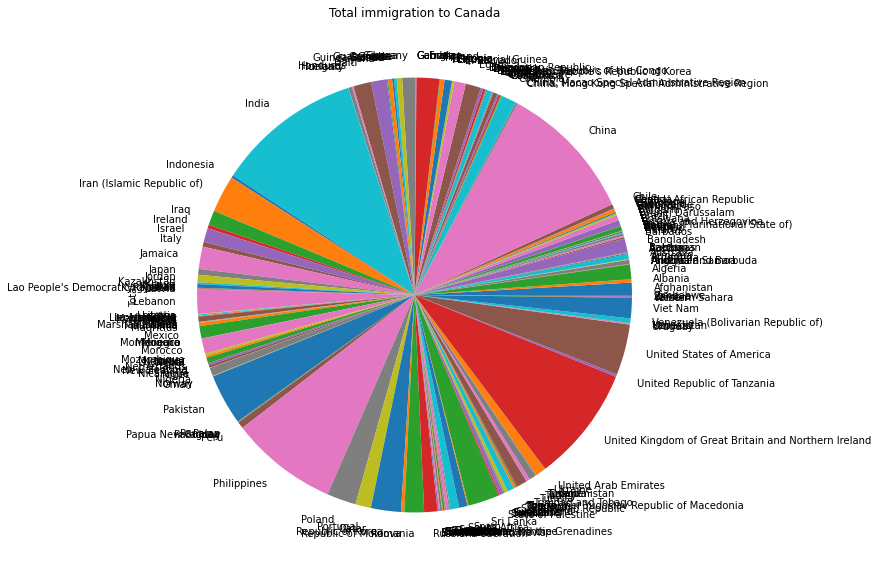

In [ ]:
canada['Total'].plot(
    kind='pie',
    figsize=(10,10),
  )
plt.title("Total immigration to Canada")

Adding filters

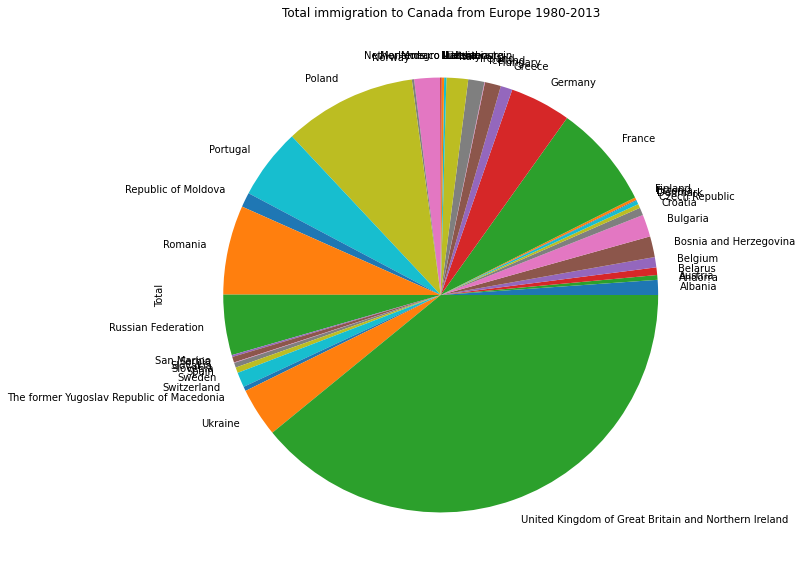

In [ ]:
temp = canada[(canada['Continent']=='Europe')]

temp['Total'].plot(
    kind='pie',
    figsize=(10,10),
  )
plt.title("Total immigration to Canada from Europe 1980-2013")
plt.show()

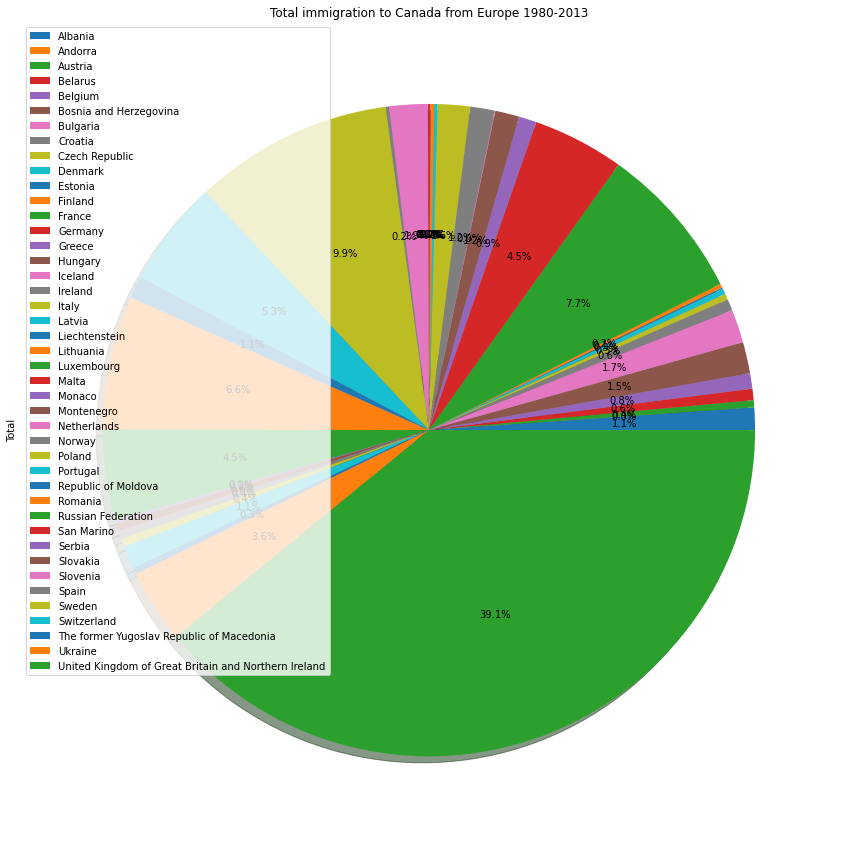

In [ ]:
temp = canada[(canada['Continent']=='Europe')]

temp['Total'].plot(
    kind='pie',
    figsize=(15,15),
    autopct='%1.1f%%',
    shadow=True,
    labels=None
  )
plt.title("Total immigration to Canada from Europe 1980-2013")
plt.legend(labels=temp.index, loc="upper left")
plt.show()

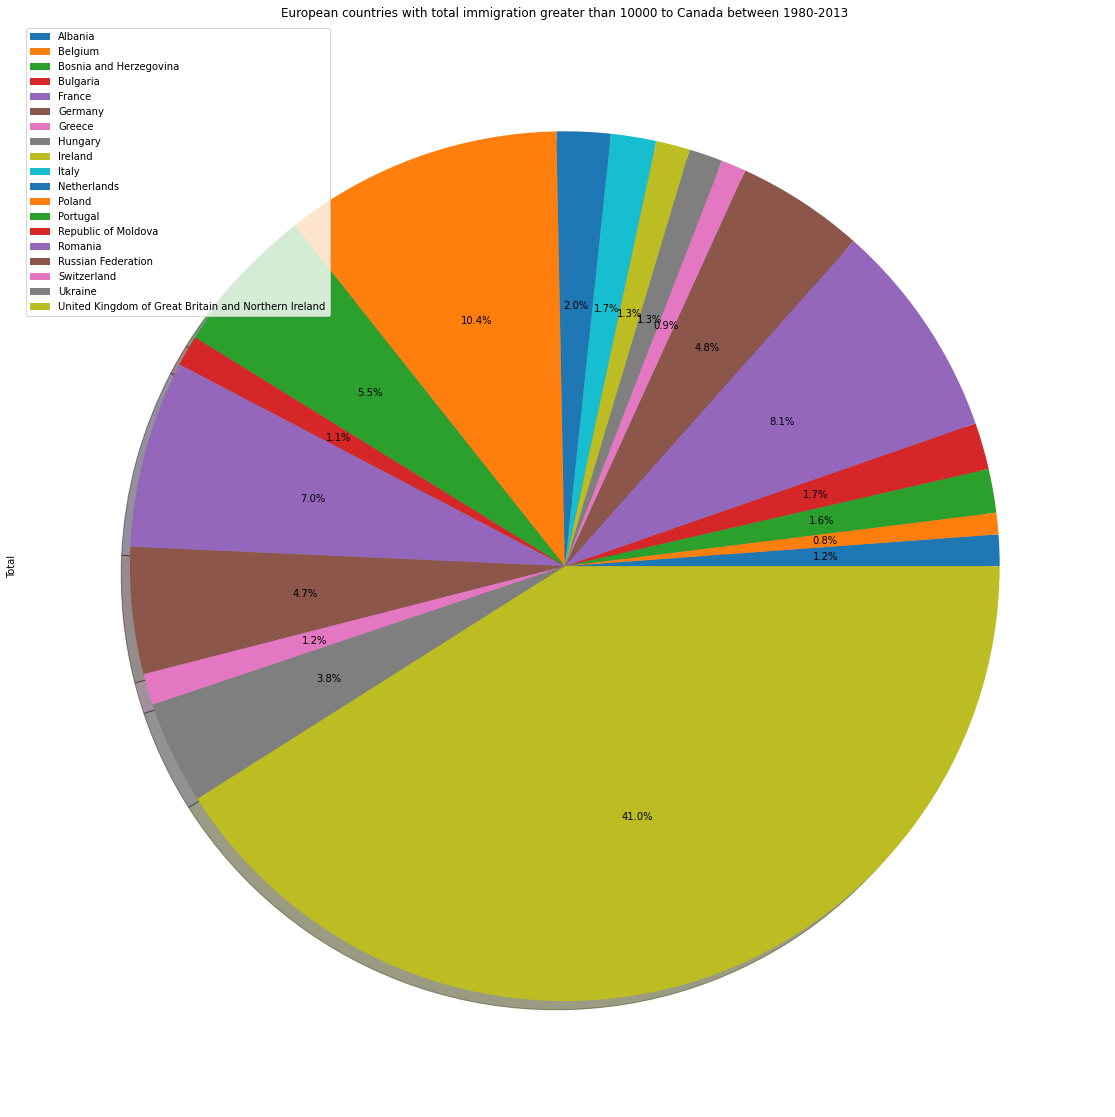

In [ ]:
temp = canada[(canada['Continent']=='Europe') & (canada['Total']>10000)]

temp['Total'].plot(
    kind='pie',
    figsize=(20,20),
    autopct='%1.1f%%',
    shadow=True,
    labels=None
  )
plt.title("European countries with total immigration greater than 10000 to Canada between 1980-2013")
plt.legend(labels=temp.index, loc="upper left")
plt.show()

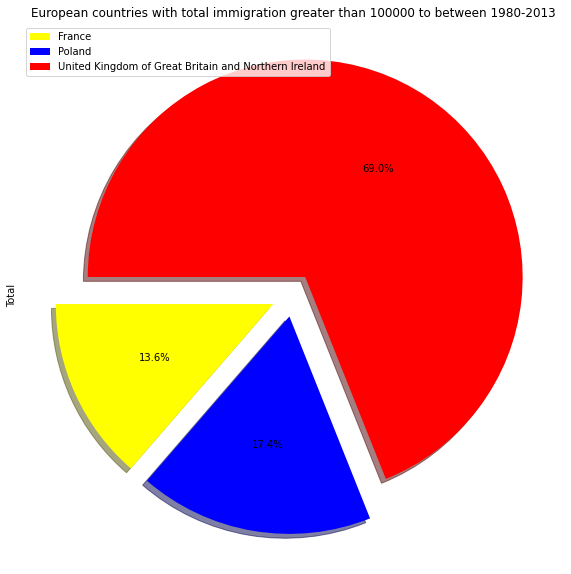

In [ ]:
temp = canada[(canada['Continent']=='Europe') & (canada['Total']>100000)]

colors = ['yellow','blue','red']
explodes = [0.1,0.1,0.1]

temp['Total'].plot(
    kind='pie',
    figsize=(10,10),
    autopct='%1.1f%%',
    shadow=True,
    labels=None,
    colors=colors,
    explode=explodes,
    startangle = 180,
  )
plt.title("European countries with total immigration greater than 100000 to between 1980-2013")
plt.legend(labels=temp.index, loc="upper left")
plt.show()

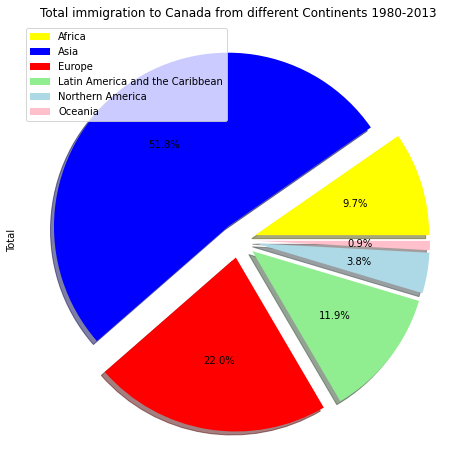

In [ ]:
temp = canada.groupby('Continent', axis='rows').sum()

colors = ['yellow','blue','red','lightgreen','lightblue','pink']
explodes = [0.1,0.1,0.1,0.1,0.1,0.1]

temp['Total'].plot(
    kind='pie',
    figsize=(8,8),
    autopct='%1.1f%%',
    shadow=True,
    labels=None,
    colors=colors,
    explode=explodes
  )
plt.title("Total immigration to Canada from different Continents 1980-2013")
plt.legend(labels=temp.index, loc="upper left")
plt.show()

**Plot a pie-chart based on Immigration by Continent-Region use explode, pct, figsize, add title, add legend and use shadows.**

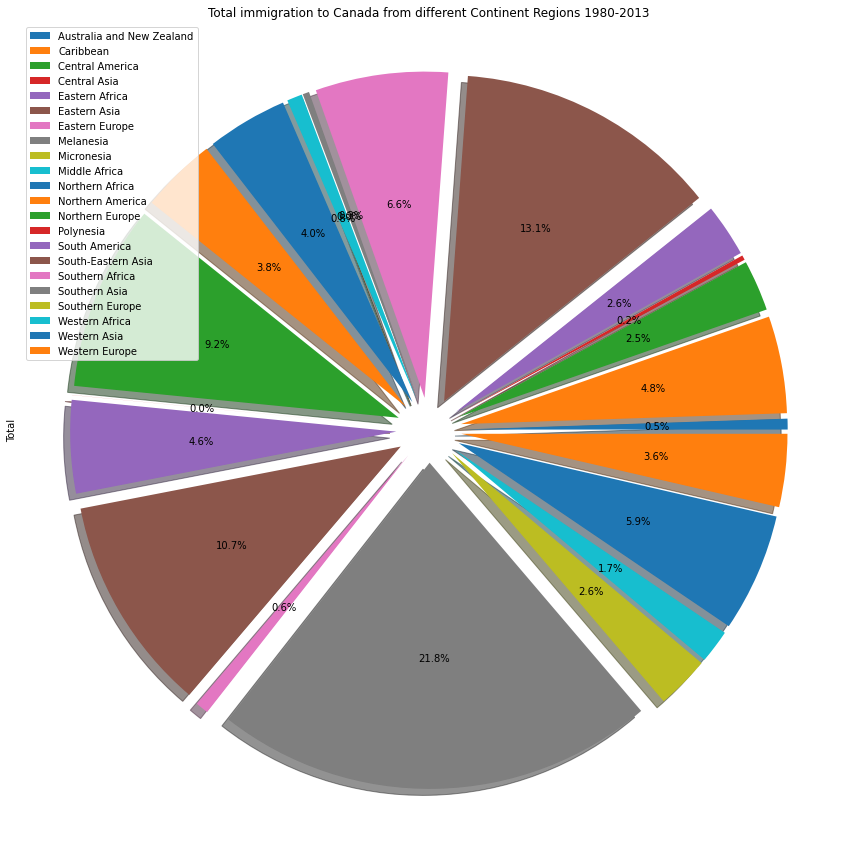

In [ ]:
temp = canada.groupby('Continent-Region', axis='rows').sum()

import numpy as np
explodes = 0.1*np.ones(22)

temp['Total'].plot(
    kind='pie',
    figsize=(15,15),
    autopct='%1.1f%%',
    shadow=True,
    labels=None,
    explode=explodes
)
plt.title("Total immigration to Canada from different Continent Regions 1980-2013")
plt.legend(labels=temp.index, loc="upper left")
plt.show()

**Ploat a pie-chart based on Development-status use colorlists, explode, pct, figsize, add title, add axes, add legend and use shadows.**

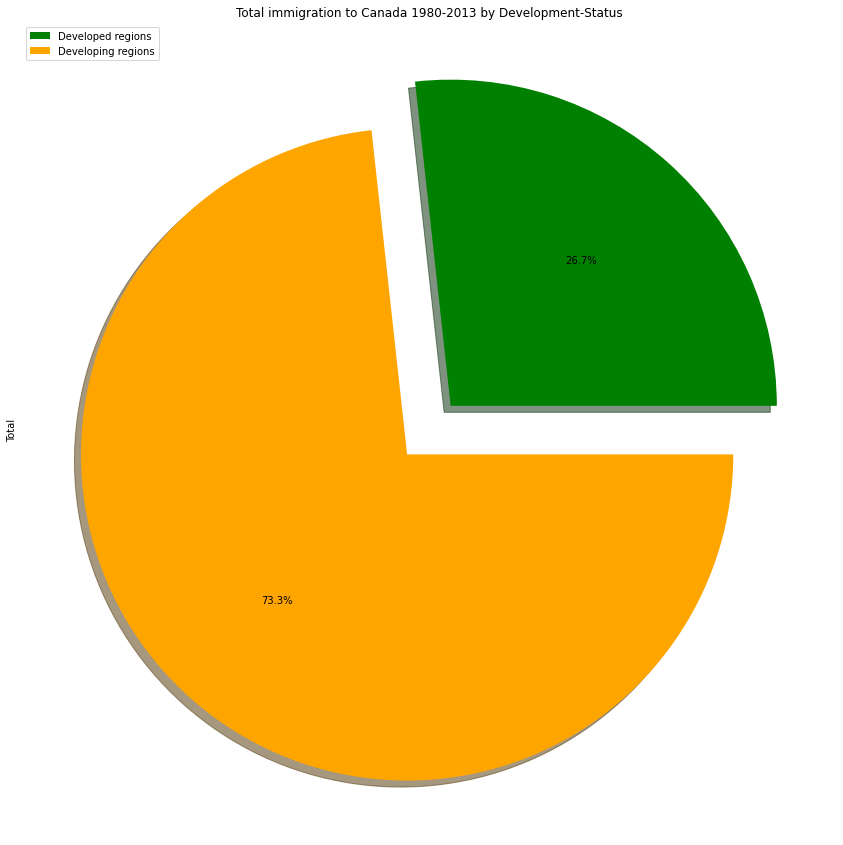

In [ ]:
temp = canada.groupby('Development-status', axis='rows').sum()

explodes = [0.1,0.1]
colors = ['green','orange']

temp['Total'].plot(
    kind='pie',
    figsize=(15,15),
    autopct='%1.1f%%',
    shadow=True,
    labels=None,
    colors=colors,
    explode=explodes
)
plt.title("Total immigration to Canada 1980-2013 by Development-Status")
plt.legend(labels=temp.index, loc="upper left")
plt.show()

## Box Plots

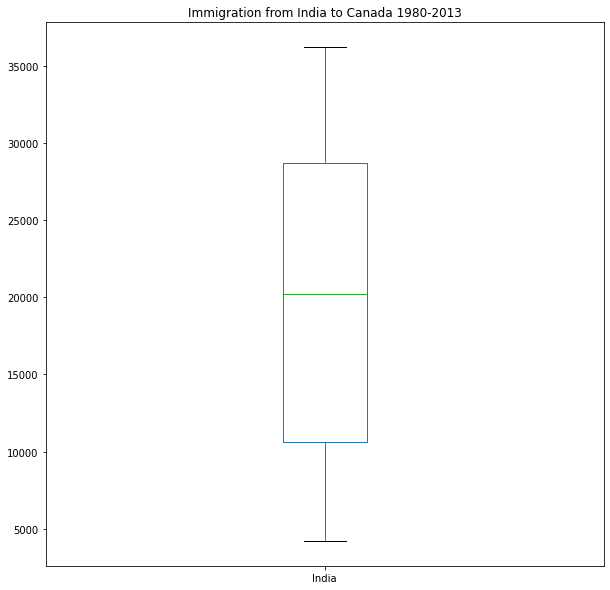

In [ ]:
temp = canada.loc[['India'],years].transpose()

temp.plot(
    kind="box",
    figsize=(10,10)
)
plt.title("Immigration from India to Canada 1980-2013")
plt.show()

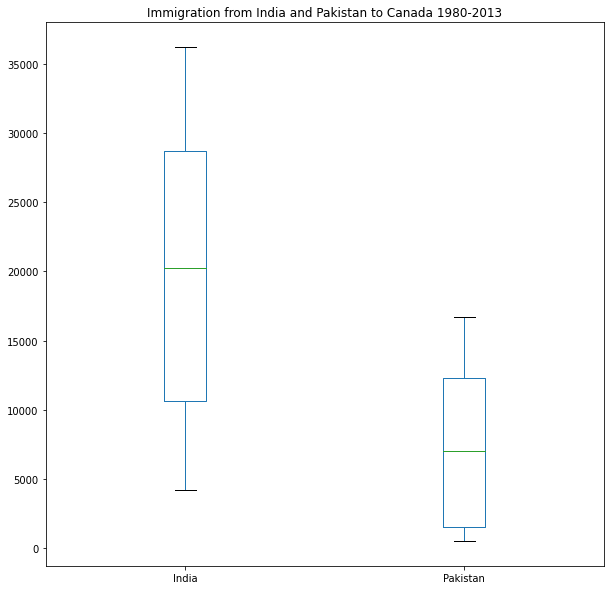

In [ ]:
temp = canada.loc[['India','Pakistan'],years].transpose()

temp.plot(
    kind="box",
    figsize=(10,10)
)
plt.title("Immigration from India and Pakistan to Canada 1980-2013")
plt.show()

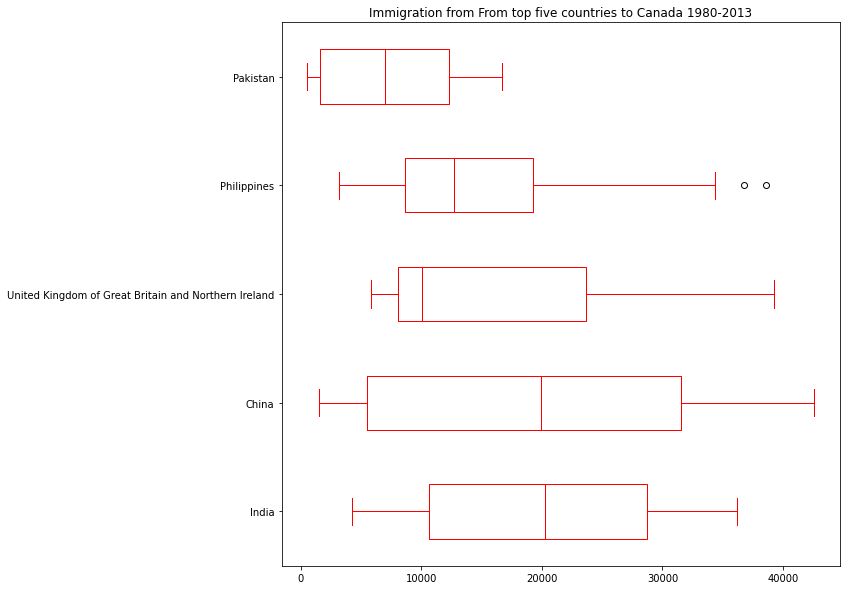

In [ ]:
canada.sort_values(by='Total', ascending=False, inplace=True, axis='index')

temp = canada.head(5)
temp = temp[years].transpose()

temp.plot(
    kind="box",
    figsize=(10,10),
    vert=False,
    color='red'
)
plt.title("Immigration from From top five countries to Canada 1980-2013")
plt.show()

Subplots

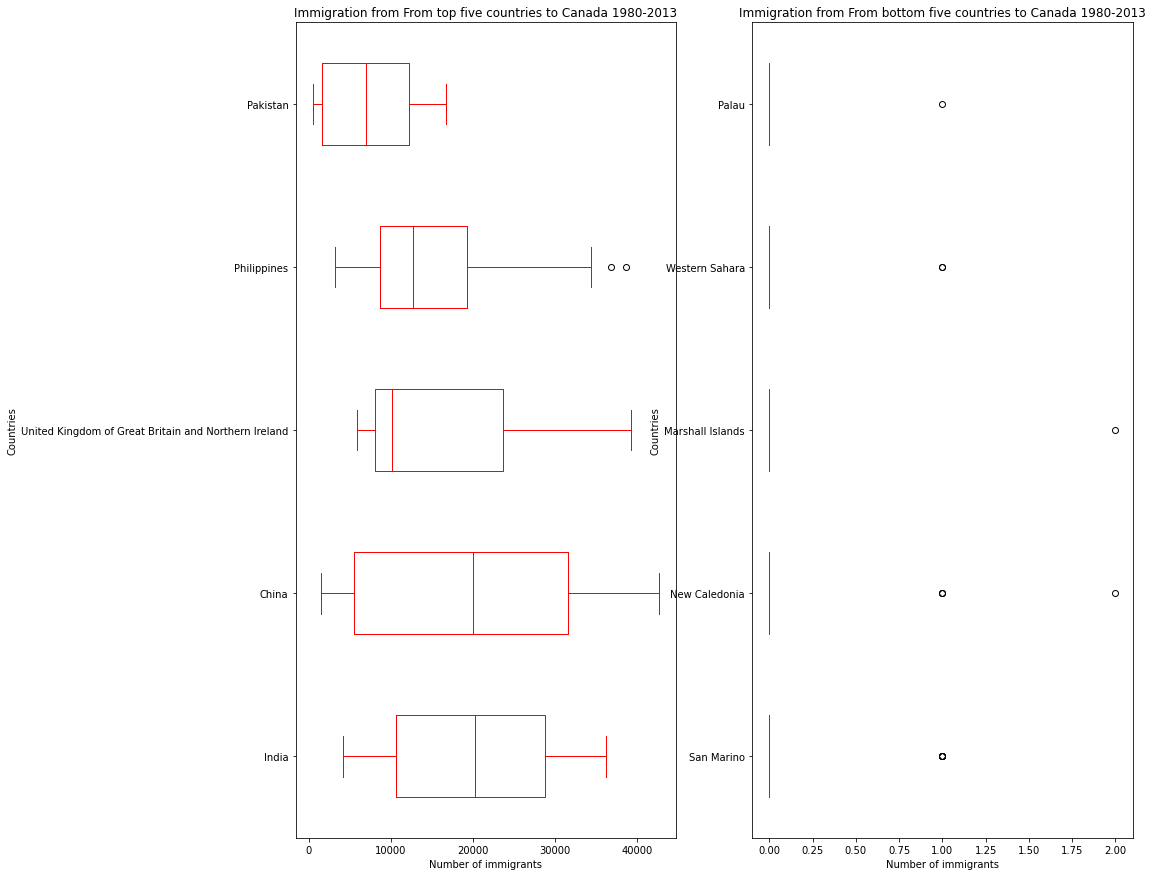

In [ ]:
canada.sort_values(by='Total', ascending=False, inplace=True, axis='index')

temp1 = canada.head(5)
temp1 = temp1[years].transpose()

temp2 = canada.tail(5)
temp2 = temp2[years].transpose()

fig = plt.figure()

ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

temp1.plot(kind="box",figsize=(15,15),vert=False,color='red', ax=ax0)
ax0.set_title("Immigration from From top five countries to Canada 1980-2013")
ax0.set_xlabel("Number of immigrants")
ax0.set_ylabel("Countries")

temp2.plot(kind="box",figsize=(15,15),vert=False,color='red', ax=ax1)
ax1.set_title("Immigration from From bottom five countries to Canada 1980-2013")
ax1.set_xlabel("Number of immigrants")
ax1.set_ylabel("Countries")

plt.show()

**Create 4 subplots - to display boxplot of top 5 countries in europe, asia, africa, oceania**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: SettingWithCop

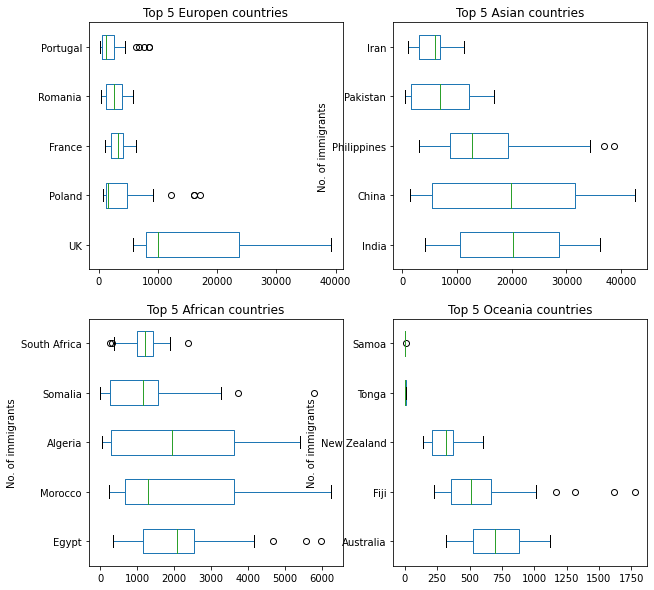

In [ ]:
years=range(1980,2014)
condition=canada['Continent']=='Europe'
dfnew=canada[(condition)]

dfnew.sort_values(by="Total",axis='index',inplace=True,ascending=False)


dtope=dfnew.head(5)
dtope=dtope[years]
dtope=dtope.transpose()
dtope.rename(columns={'United Kingdom of Great Britain and Northern Ireland':'UK'}, inplace=True)

condition=canada['Continent']=='Asia'
dfnew=canada[(condition)]

dfnew.sort_values(by="Total",axis='index',inplace=True,ascending=False)


dtopa=dfnew.head(5)
dtopa=dtopa[years]
dtopa=dtopa.transpose()
dtopa.rename(columns={'Iran (Islamic Republic of)':'Iran'}, inplace=True)

dtopa.tail()

years=range(1980,2014)
condition=canada['Continent']=='Africa'
dfnew=canada[(condition)]

dfnew.sort_values(by="Total",axis='index',inplace=True,ascending=False)


dtopaf=dfnew.head(5)
dtopaf=dtopaf[years]
dtopaf=dtopaf.transpose()
dtopaf.tail()

years=range(1980,2014)
condition=canada['Continent']=='Oceania'
dfnew=canada[(condition)]

dfnew.sort_values(by="Total",axis='index',inplace=True,ascending=False)


dtopo=dfnew.head(5)
dtopo=dtopo[years]
dtopo=dtopo.transpose()
dtopo.tail()

#using subplots

fig=plt.figure()

#Create 2 subplots
ax1=fig.add_subplot(2,2,1)#2 row,2 columsn-1st figure
ax2=fig.add_subplot(2,2,2)#2 row,2 columsn-2nd figure
ax3=fig.add_subplot(2,2,3)#2 row,2 columsn-3rd figure
ax4=fig.add_subplot(2,2,4)#2 row,2 columsn-4th figure

#write whic is ax1 and which is ax2
dtope.plot(kind='box',figsize=(10,10),vert=False,ax=ax1)
ax1.set_title("Top 5 Europen countries")
ax2.set_ylabel('No. of immigrants')

dtopa.plot(kind='box',figsize=(10,10),vert=False,ax=ax2)
ax2.set_title("Top 5 Asian countries")
ax2.set_ylabel('No. of immigrants')

dtopaf.plot(kind='box',figsize=(10,10),vert=False,ax=ax3)
ax3.set_title("Top 5 African countries")
ax3.set_ylabel('No. of immigrants')

dtopo.plot(kind='box',figsize=(10,10),vert=False,ax=ax4)
ax4.set_title("Top 5 Oceania countries")
ax4.set_ylabel('No. of immigrants')



plt.show()

In [ ]:
# identify outliers
# any value greater than Q3 by 1.5IQR
#any value less than Q1 by 1.5IQR
#IQR = Q3-Q1

dfindia = canada.loc[['India'], years].transpose().describe()

Q1 = 10343.0
Q3= 28572.0
IQR=Q3-Q1
Outlier1 = Q3+1.5*IQR
Outlier2 = Q1 - 1.5*IQR
print(Outlier1)
print(Outlier2)

55915.5
-17000.5


In [ ]:
dfindia = df_can.loc[['India'], years]

In [ ]:
#Scatter plot
years = range(1980,2014)
dfscat = pd.DataFrame(df_can[years].sum(axis='index'))

dfscat.reset_index(inplace=True)

dfscat.columns = ['Year', 'Total']

dfscat.head()

In [ ]:
dfscat.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Total',
    color='blue'
)
plt.title("Total immigration to canada from 1980-2013")
plt.xlabel("Years")
plt.ylabel("Number of immigrants")
plt.show()

In [ ]:
import numpy as np
x=dfscat['Year']
y=dfscat['Total']
fit=np.polyfit(x,y,1)




dfscat.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Total',
    color='blue'
)
plt.title("Total immigration to canada from 1980-2013")
plt.xlabel("Years")
plt.ylabel("Number of immigrants")

plt.plot(x, fit[0]*x+fit[1], color='red')

plt.show()

In [ ]:

dfindopak = df_can.loc[['India','Pakistan'], years].transpose()
dfindopak.reset_index(inplace=True)
dfindopak.index.name = 'index'
dfindopak.rename(columns={'index':'Year'}, inplace=True)

ax0 = dfindopak.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='India',
    color='orange'
)

ax1 = dfindopak.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Pakistan',
    color='green',
    ax=ax0
)


ax0.set_title("India and Pakistan immigration to canada from 1980-2013")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of immigrants")
ax0.legend(['India','Pakistan'], loc='upper left')



In [ ]:
#bubble plots - size of each dot on the scatter plot is proportional to its magnitude
#min-max scaling = X' = (X - Xmin)/(Xmax - Xmin)

normindia = (dfindopak['India'] - dfindopak['India'].min()) / (dfindopak['India'].max() - dfindopak['India'].min())
normpak = (dfindopak['Pakistan'] - dfindopak['Pakistan'].min()) / (dfindopak['Pakistan'].max() - dfindopak['Pakistan'].min())

ax0 = dfindopak.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='India',
    color='blue',
    s = normindia*200
)

ax1 = dfindopak.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Pakistan',
    color='green',
    ax=ax0,
    s = normpak*200
)


ax0.set_title("India and Pakistan immigration to canada from 1980-2013")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of immigrants")
ax0.legend(['India','Pakistan'], loc='upper left')
